# Analyse Nino3.4 variance

Use preprocessed NINO34 average time series

CanESM5
MIROC6

## Setup
### load required packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import numpy as np
# from scipy.io import netcdf
# import scipy.stats as stats
import pandas as pd

import xarray as xr
# import random
import os
from pprint import pprint
from tqdm import tqdm

# # Import Cdo-py (only works with custom environment)
# import cdo
# cdo = cdo.Cdo() #


    


## set paths

In [2]:
# directories with processed output
basedir_processed_NINO34 = '/glade/scratch/milinski/ESGF_downloads/NINO34/'

# directory for saving plots
plotdir = './plots/nino34/'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
    



## load MIROC6

In [3]:
var = 'tos'
model = 'MIROC6'
experiment = 'historical'
filepath = basedir_processed_NINO34 + 'MIROC6/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    id = 'r'+str(member)+'i1p1f1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


miroc6_historical_nino34 = xr.concat(ds, dim='ensemble')
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 50/50 [00:00<00:00, 66.73it/s]


In [4]:
var = 'tos'
model = 'MIROC6'
experiment = 'ssp585'
filepath = basedir_processed_NINO34 + 'MIROC6/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    id = 'r'+str(member)+'i1p1f1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


miroc6_ssp585_nino34 = xr.concat(ds, dim='ensemble')
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 50/50 [00:00<00:00, 60.66it/s]


In [6]:
miroc6_nino34 = xr.concat([miroc6_historical_nino34,miroc6_ssp585_nino34],dim='time')

## load CanESM5

In [26]:
var = 'tos'
model = 'CanESM5'
experiment = 'historical'
filepath = basedir_processed_NINO34 + model + '/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    if member<=25:
        id='r'+str(member)+'i1p1f1'
    else:
        id='r'+str(member-25)+'i1p2f1'
    file = file_prefix+id+file_suffix
#     print(file)
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


canesm5_historical_nino34 = xr.concat(ds, dim='ensemble')
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 50/50 [00:01<00:00, 46.72it/s]


In [27]:
var = 'tos'
model = 'CanESM5'
experiment = 'ssp585'
filepath = basedir_processed_NINO34 + model + '/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    if member<=25:
        id='r'+str(member)+'i1p1f1'
    else:
        id='r'+str(member-25)+'i1p2f1'
    file = file_prefix+id+file_suffix
#     print(file)
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


canesm5_ssp585_nino34 = xr.concat(ds, dim='ensemble')
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 50/50 [00:00<00:00, 72.57it/s]


In [28]:
canesm5_nino34 = xr.concat([canesm5_historical_nino34,canesm5_ssp585_nino34],dim='time')

In [29]:
canesm5_nino34_DJF = canesm5_nino34['tos'][:,11:].resample(time="QS-DEC").sum()[:,0::4][:,0:-1]/3
miroc6_nino34_DJF = miroc6_nino34['tos'][:,11:].resample(time="QS-DEC").sum()[:,0::4][:,0:-1]/3

## load CESM2-LENS

In [201]:
var = 'sst'
model = 'CESM2-LENS'
experiment = 'BHISTcmip6'
filepath = basedir_processed_NINO34 + model+'/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    id = 'member'+str(member)
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)

cesm2_historical_nino34 = xr.concat(ds, dim='ensemble')


100%|██████████| 50/50 [00:01<00:00, 31.57it/s]


In [202]:
member

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2)
Coordinates:
  * time       (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
    lon        float64 0.0
    lat        float64 0.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    SST        (time) float64 ...
Attributes: (12/13)
    CDI:               Climate Data Interface version 1.9.10 (https://mpimet....
    Conventions:       CF-1.0
    source:            CAM
    case:              b.e21.BHISTcmip6.f09_g17.LE2-1301.010
    logname:           sunseon
    host:              mom2
    ...                ...
    topography_file:   /mnt/lustre/share/CESM/cesm_input/atm/cam/topo/fv_0.9x...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1
    history:           Tue Aug 10 15:49:22 2021: cdo fldmean -sellonlatbox,-1...
    NCO:               netCDF Operators version 4.9.5 (Homepage = http://nco....
    CDO:               Climate Data Operators version 1.9.10 (https://mpimet....

In [203]:
cesm2_historical_nino34 = cesm2_historical_nino34['SST'][list(np.arange(0,10))+list(np.arange(11,50)),:]

In [204]:
var = 'sst'
model = 'CESM2-LENS'
experiment = 'BSSP370cmip6'
filepath = basedir_processed_NINO34 + model+'/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_nino34.nc'

# initialise array:
ds = []

for member in tqdm(list(np.arange(1,11))+list(np.arange(12,51))):
    id = 'member'+str(member)
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).SST.squeeze()
    ds.append(member)
    print(len(member['time']))
#

cesm2_ssp370_nino34 = xr.concat(ds, dim='ensemble')


 16%|█▋        | 8/49 [00:00<00:01, 39.28it/s]

1032
1032
1032
1032
1032
1032
1032
1032
1032
1032


 33%|███▎      | 16/49 [00:00<00:00, 42.07it/s]

1032
1032
1032
1032
1032
1032


TypeError: len() of unsized object

In [36]:
miroc6_nino34 = xr.concat([miroc_historical_nino34,miroc_ssp585_nino34],dim='time')

## plots

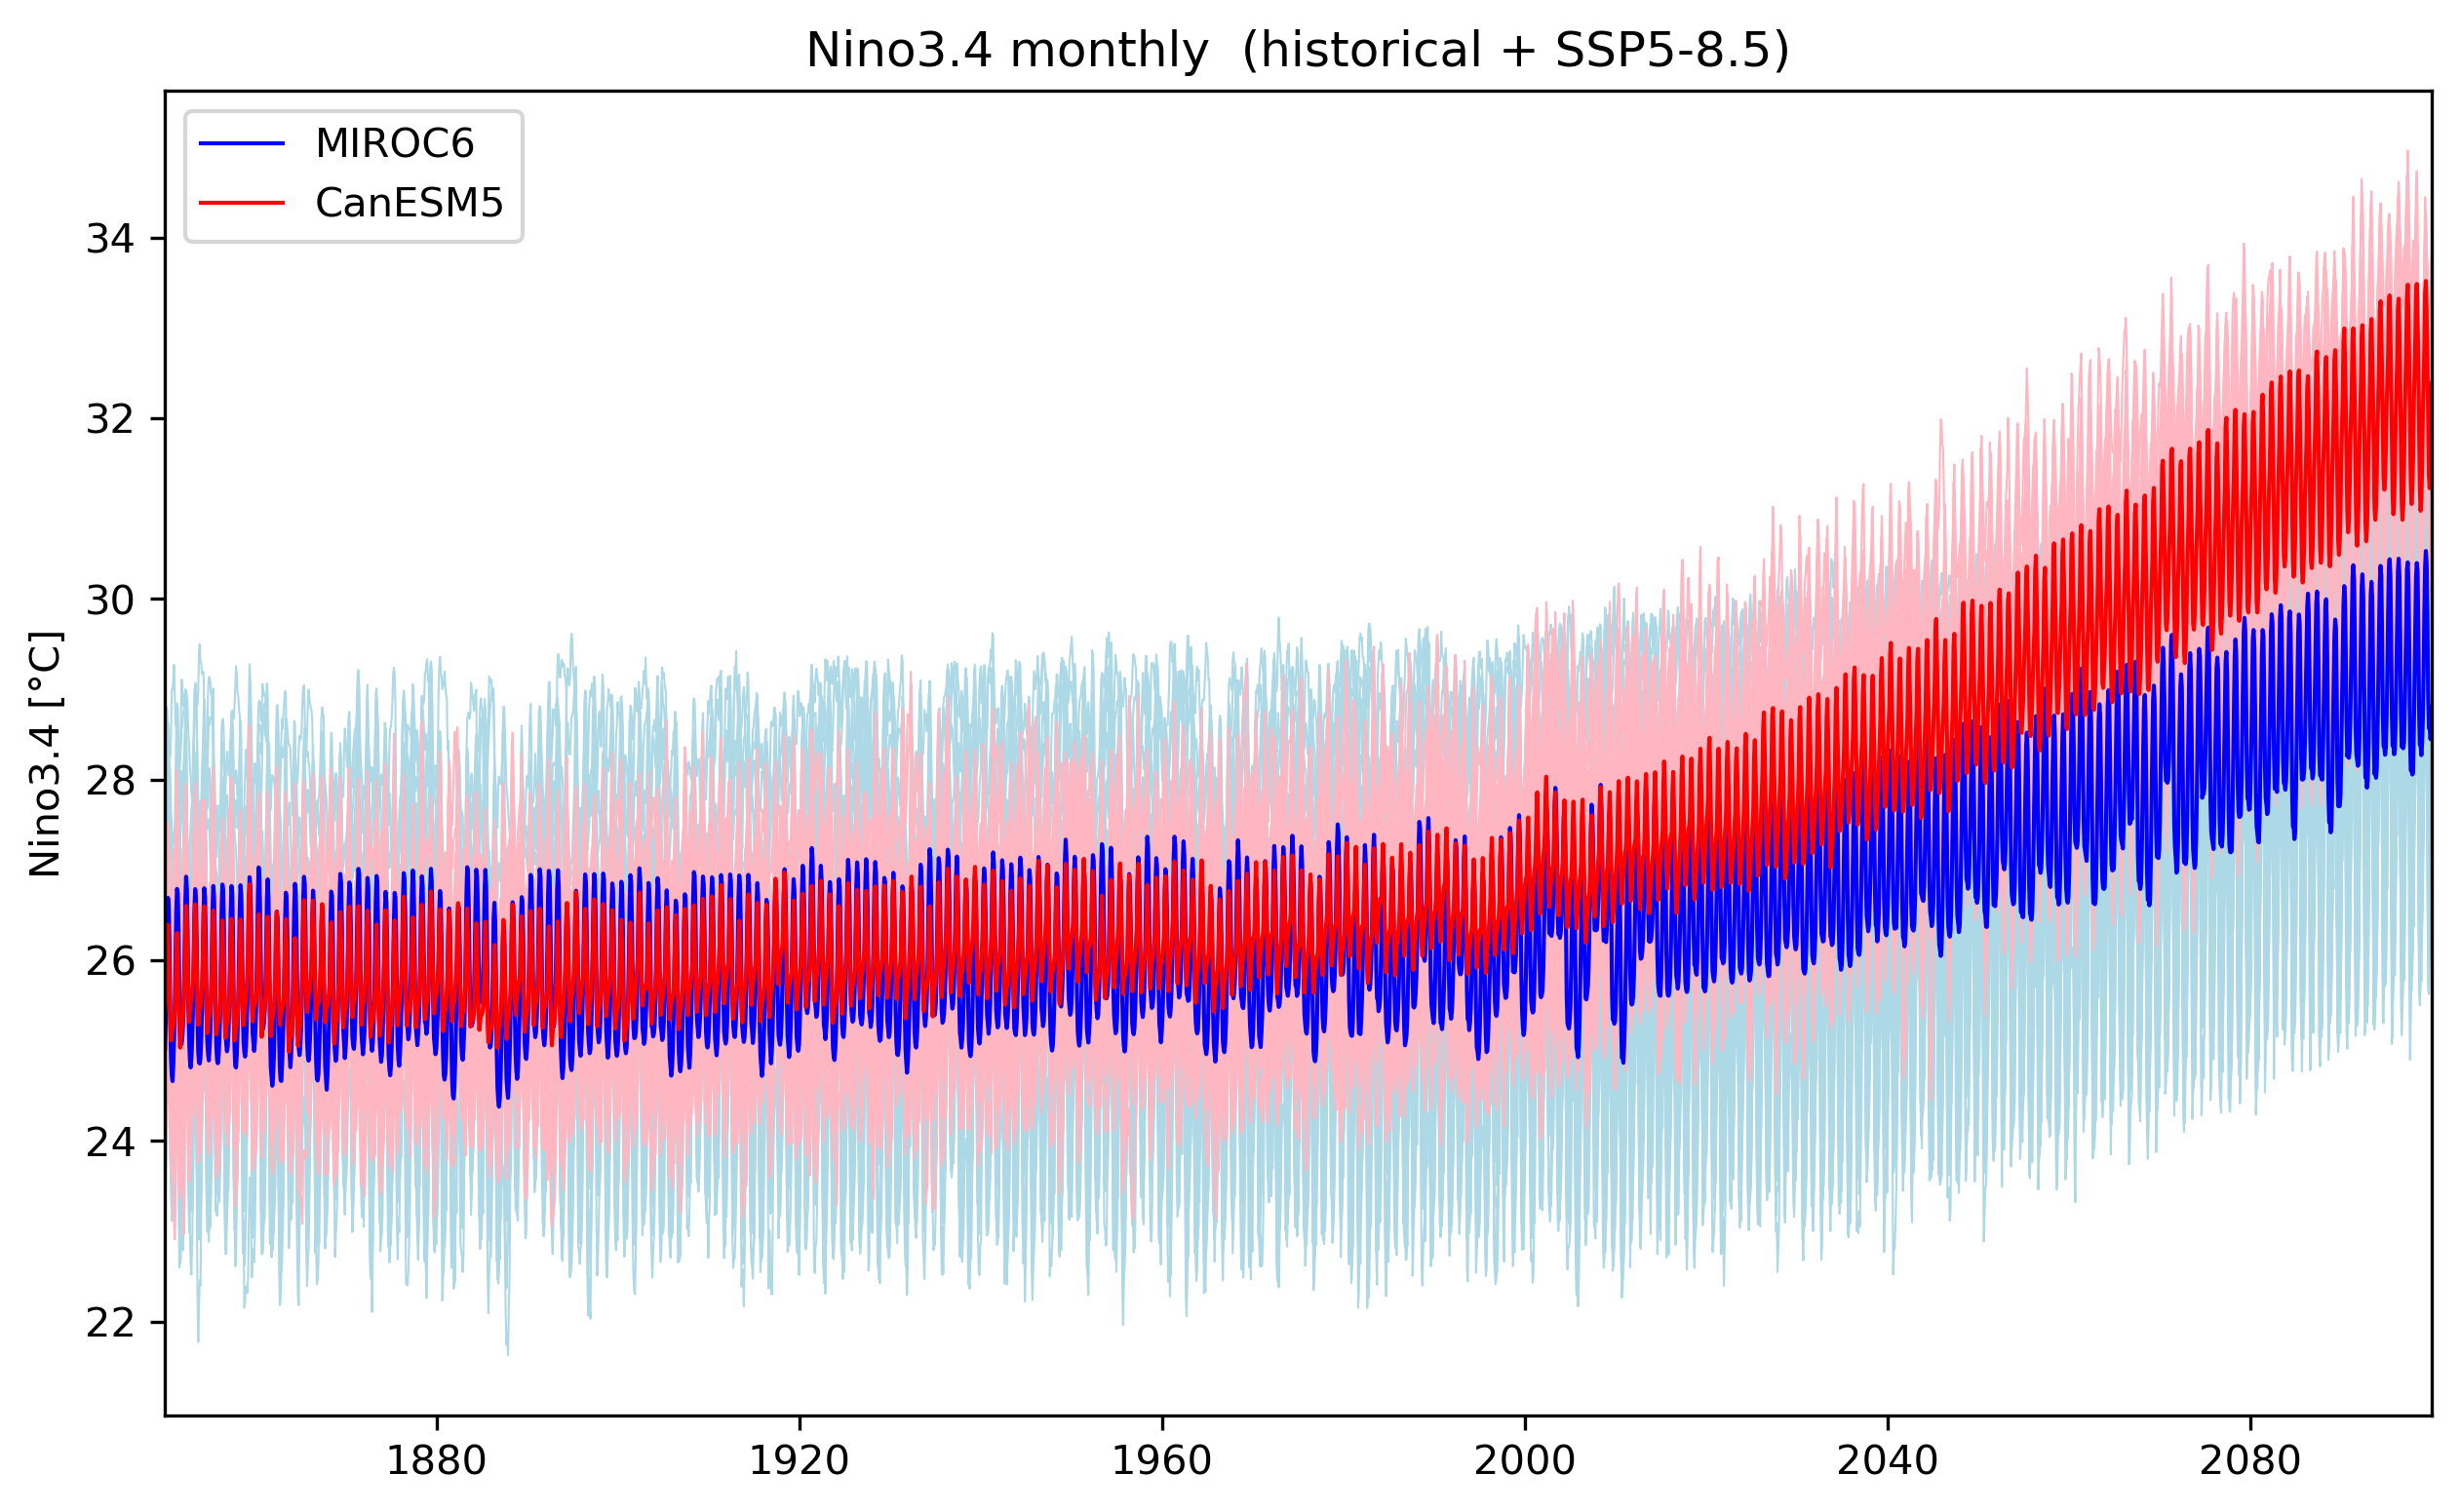

In [30]:
# time series
plt.figure(figsize=(10, 6), dpi=300)

plt.plot(miroc6_nino34['time'].values,miroc6_nino34[var].transpose(),color='lightblue',linewidth=0.5);
plt.plot(canesm5_nino34['time'].values,canesm5_nino34[var].transpose(),color='lightpink',linewidth=0.5);


plt.plot(miroc6_nino34['time'].values,miroc6_nino34[var].mean(dim='ensemble'),color='blue',linewidth=1,label='MIROC6');
plt.plot(canesm5_nino34['time'].values,canesm5_nino34[var].mean(dim='ensemble'),color='red',linewidth=1,label='CanESM5');



plt.legend()
plt.title('Nino3.4 monthly  (historical + SSP5-8.5)')

plt.ylabel('Nino3.4 [°C]')
plt.xlim([pd.Timestamp('1850-01-01'),pd.Timestamp('2100-01-01')])
# plt.xlim([1850,2100])

plt.savefig(plotdir+'nino34_monthly.png', bbox_inches='tight', dpi=300)

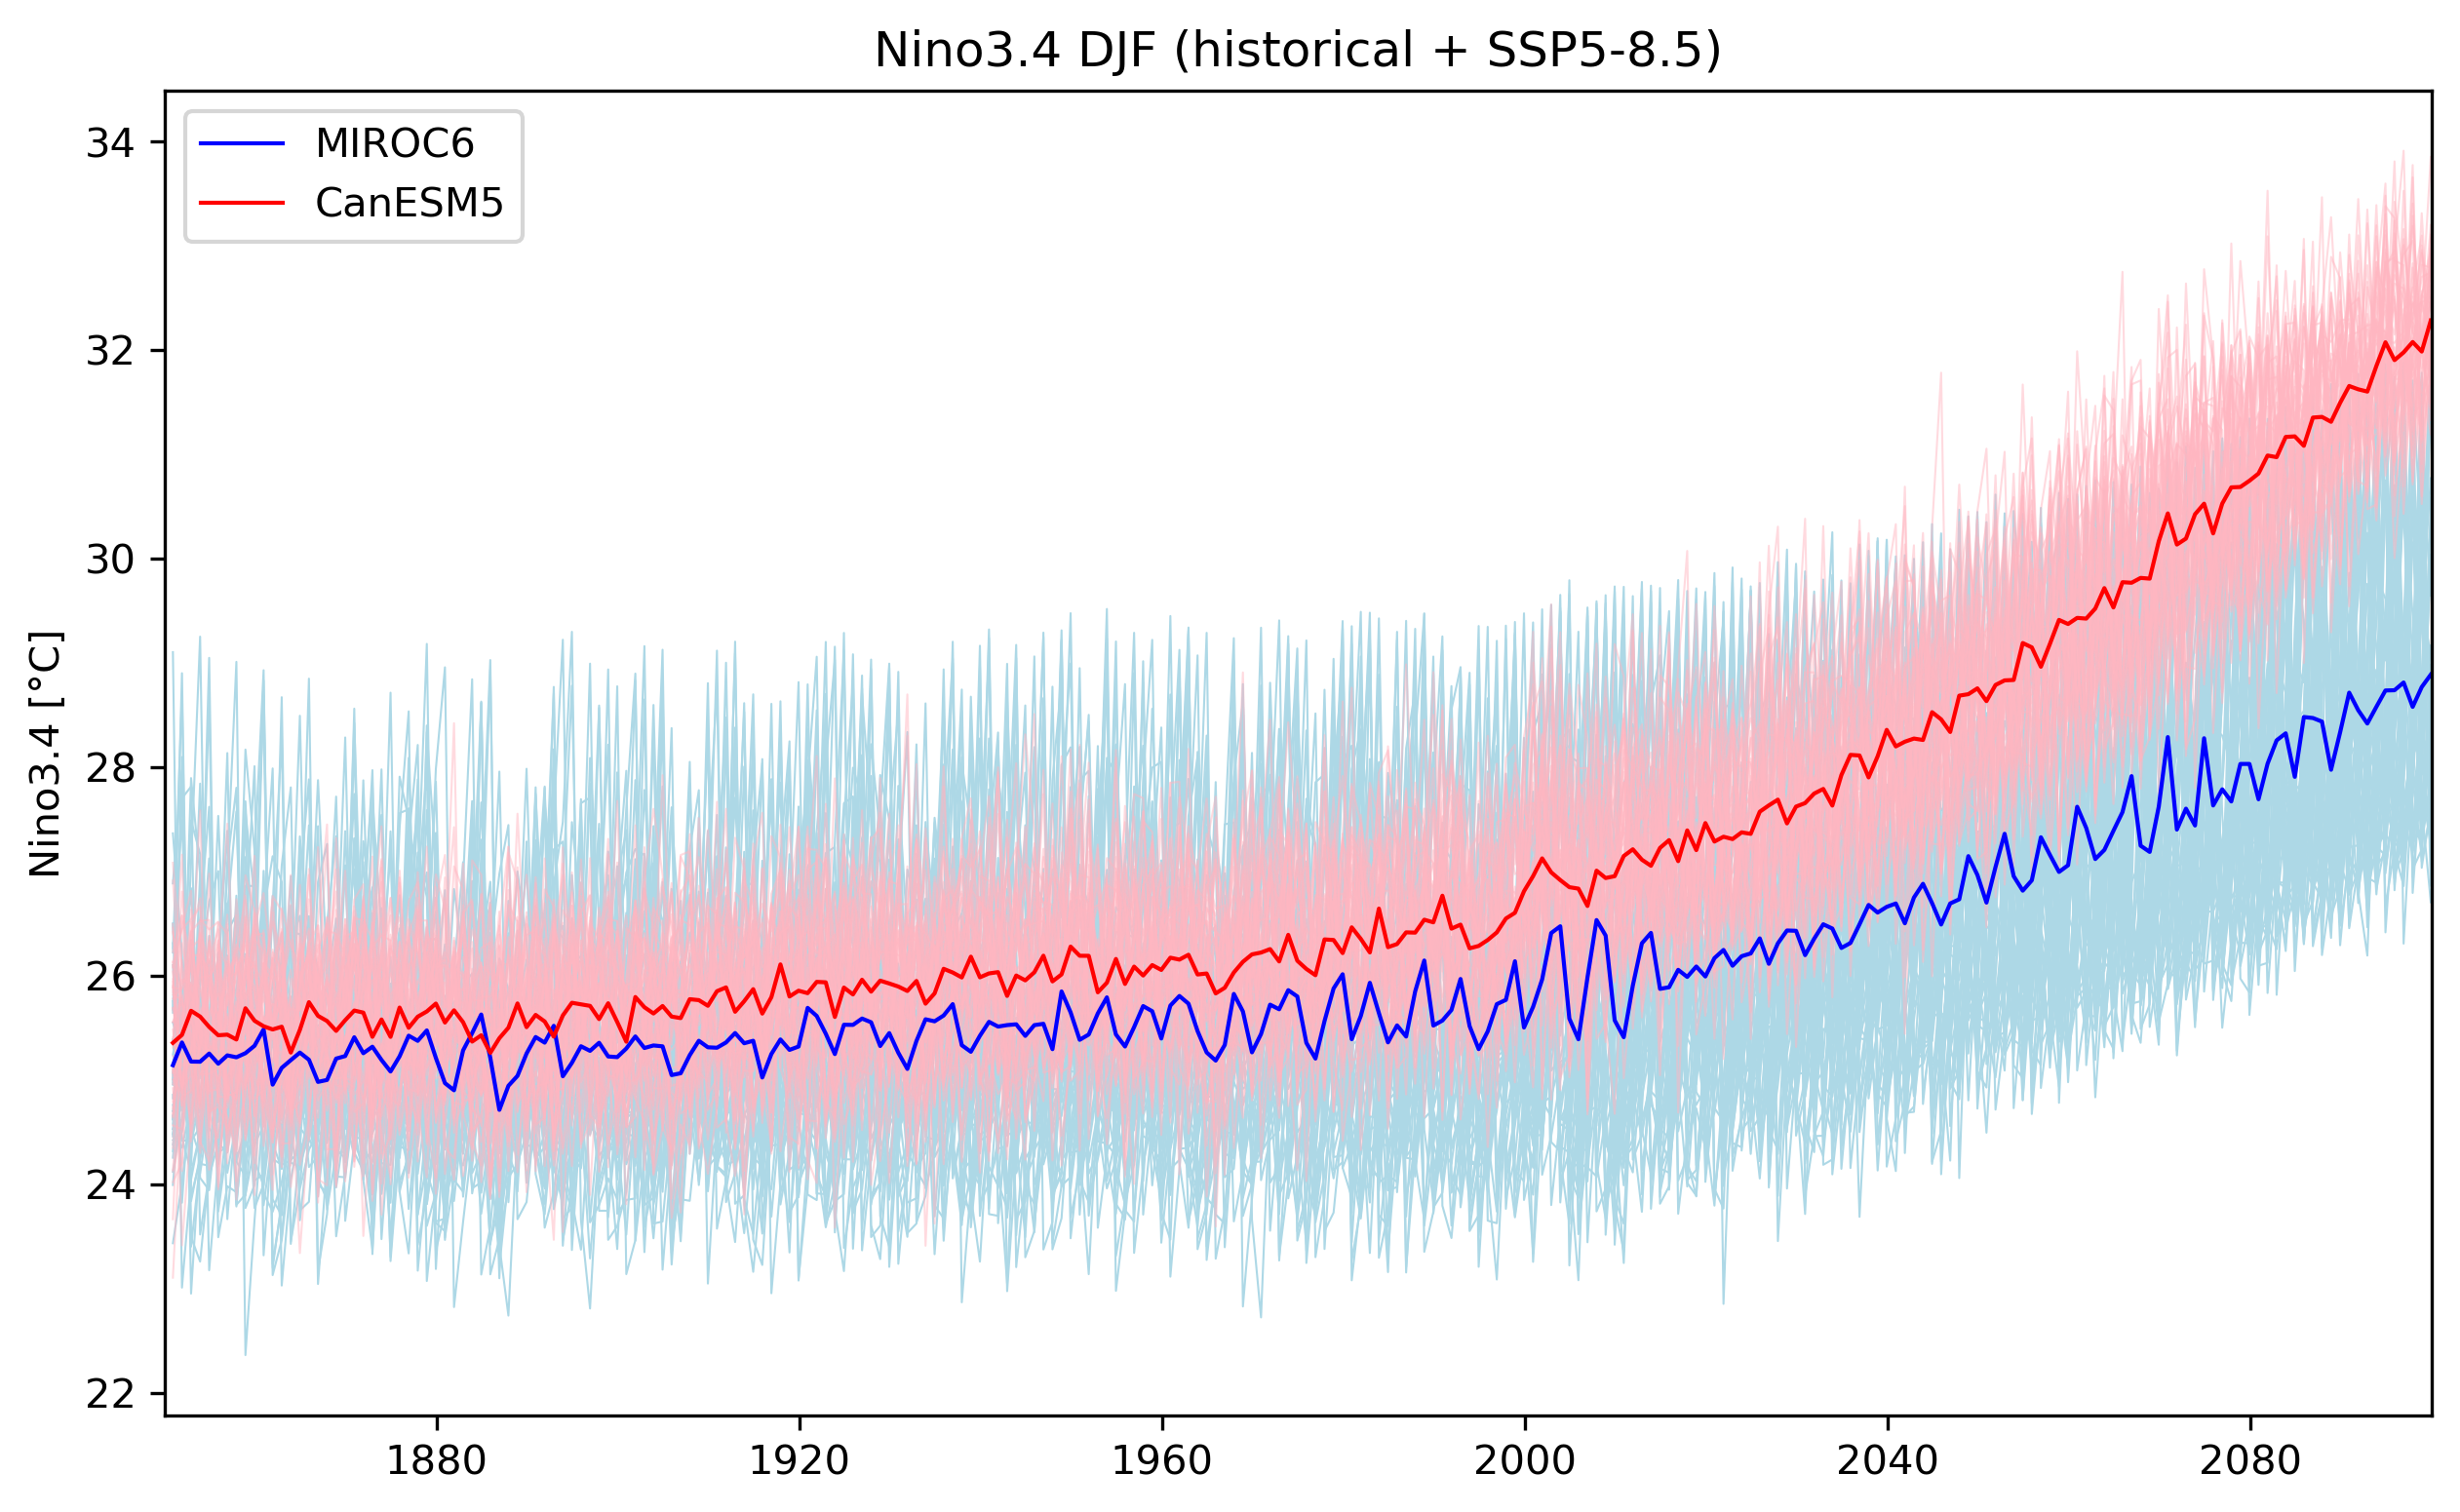

In [32]:
# time series
plt.figure(figsize=(10, 6), dpi=300)

plt.plot(miroc6_nino34_DJF['time'].values,miroc6_nino34_DJF.transpose(),color='lightblue',linewidth=0.5);
plt.plot(canesm5_nino34_DJF['time'].values,canesm5_nino34_DJF.transpose(),color='lightpink',linewidth=0.5,alpha=0.5);

plt.plot(miroc6_nino34_DJF['time'].values,miroc6_nino34_DJF.mean(dim='ensemble'),color='blue',linewidth=1,label='MIROC6');
plt.plot(canesm5_nino34_DJF['time'].values,canesm5_nino34_DJF.mean(dim='ensemble'),color='red',linewidth=1,label='CanESM5');


plt.legend()
plt.title('Nino3.4 DJF (historical + SSP5-8.5)')

plt.ylabel('Nino3.4 [°C]')
plt.xlim([pd.Timestamp('1850-01-01'),pd.Timestamp('2100-01-01')])
# plt.xlim([1850,2100])

plt.savefig(plotdir+'nino34_DJF.png', bbox_inches='tight', dpi=300)

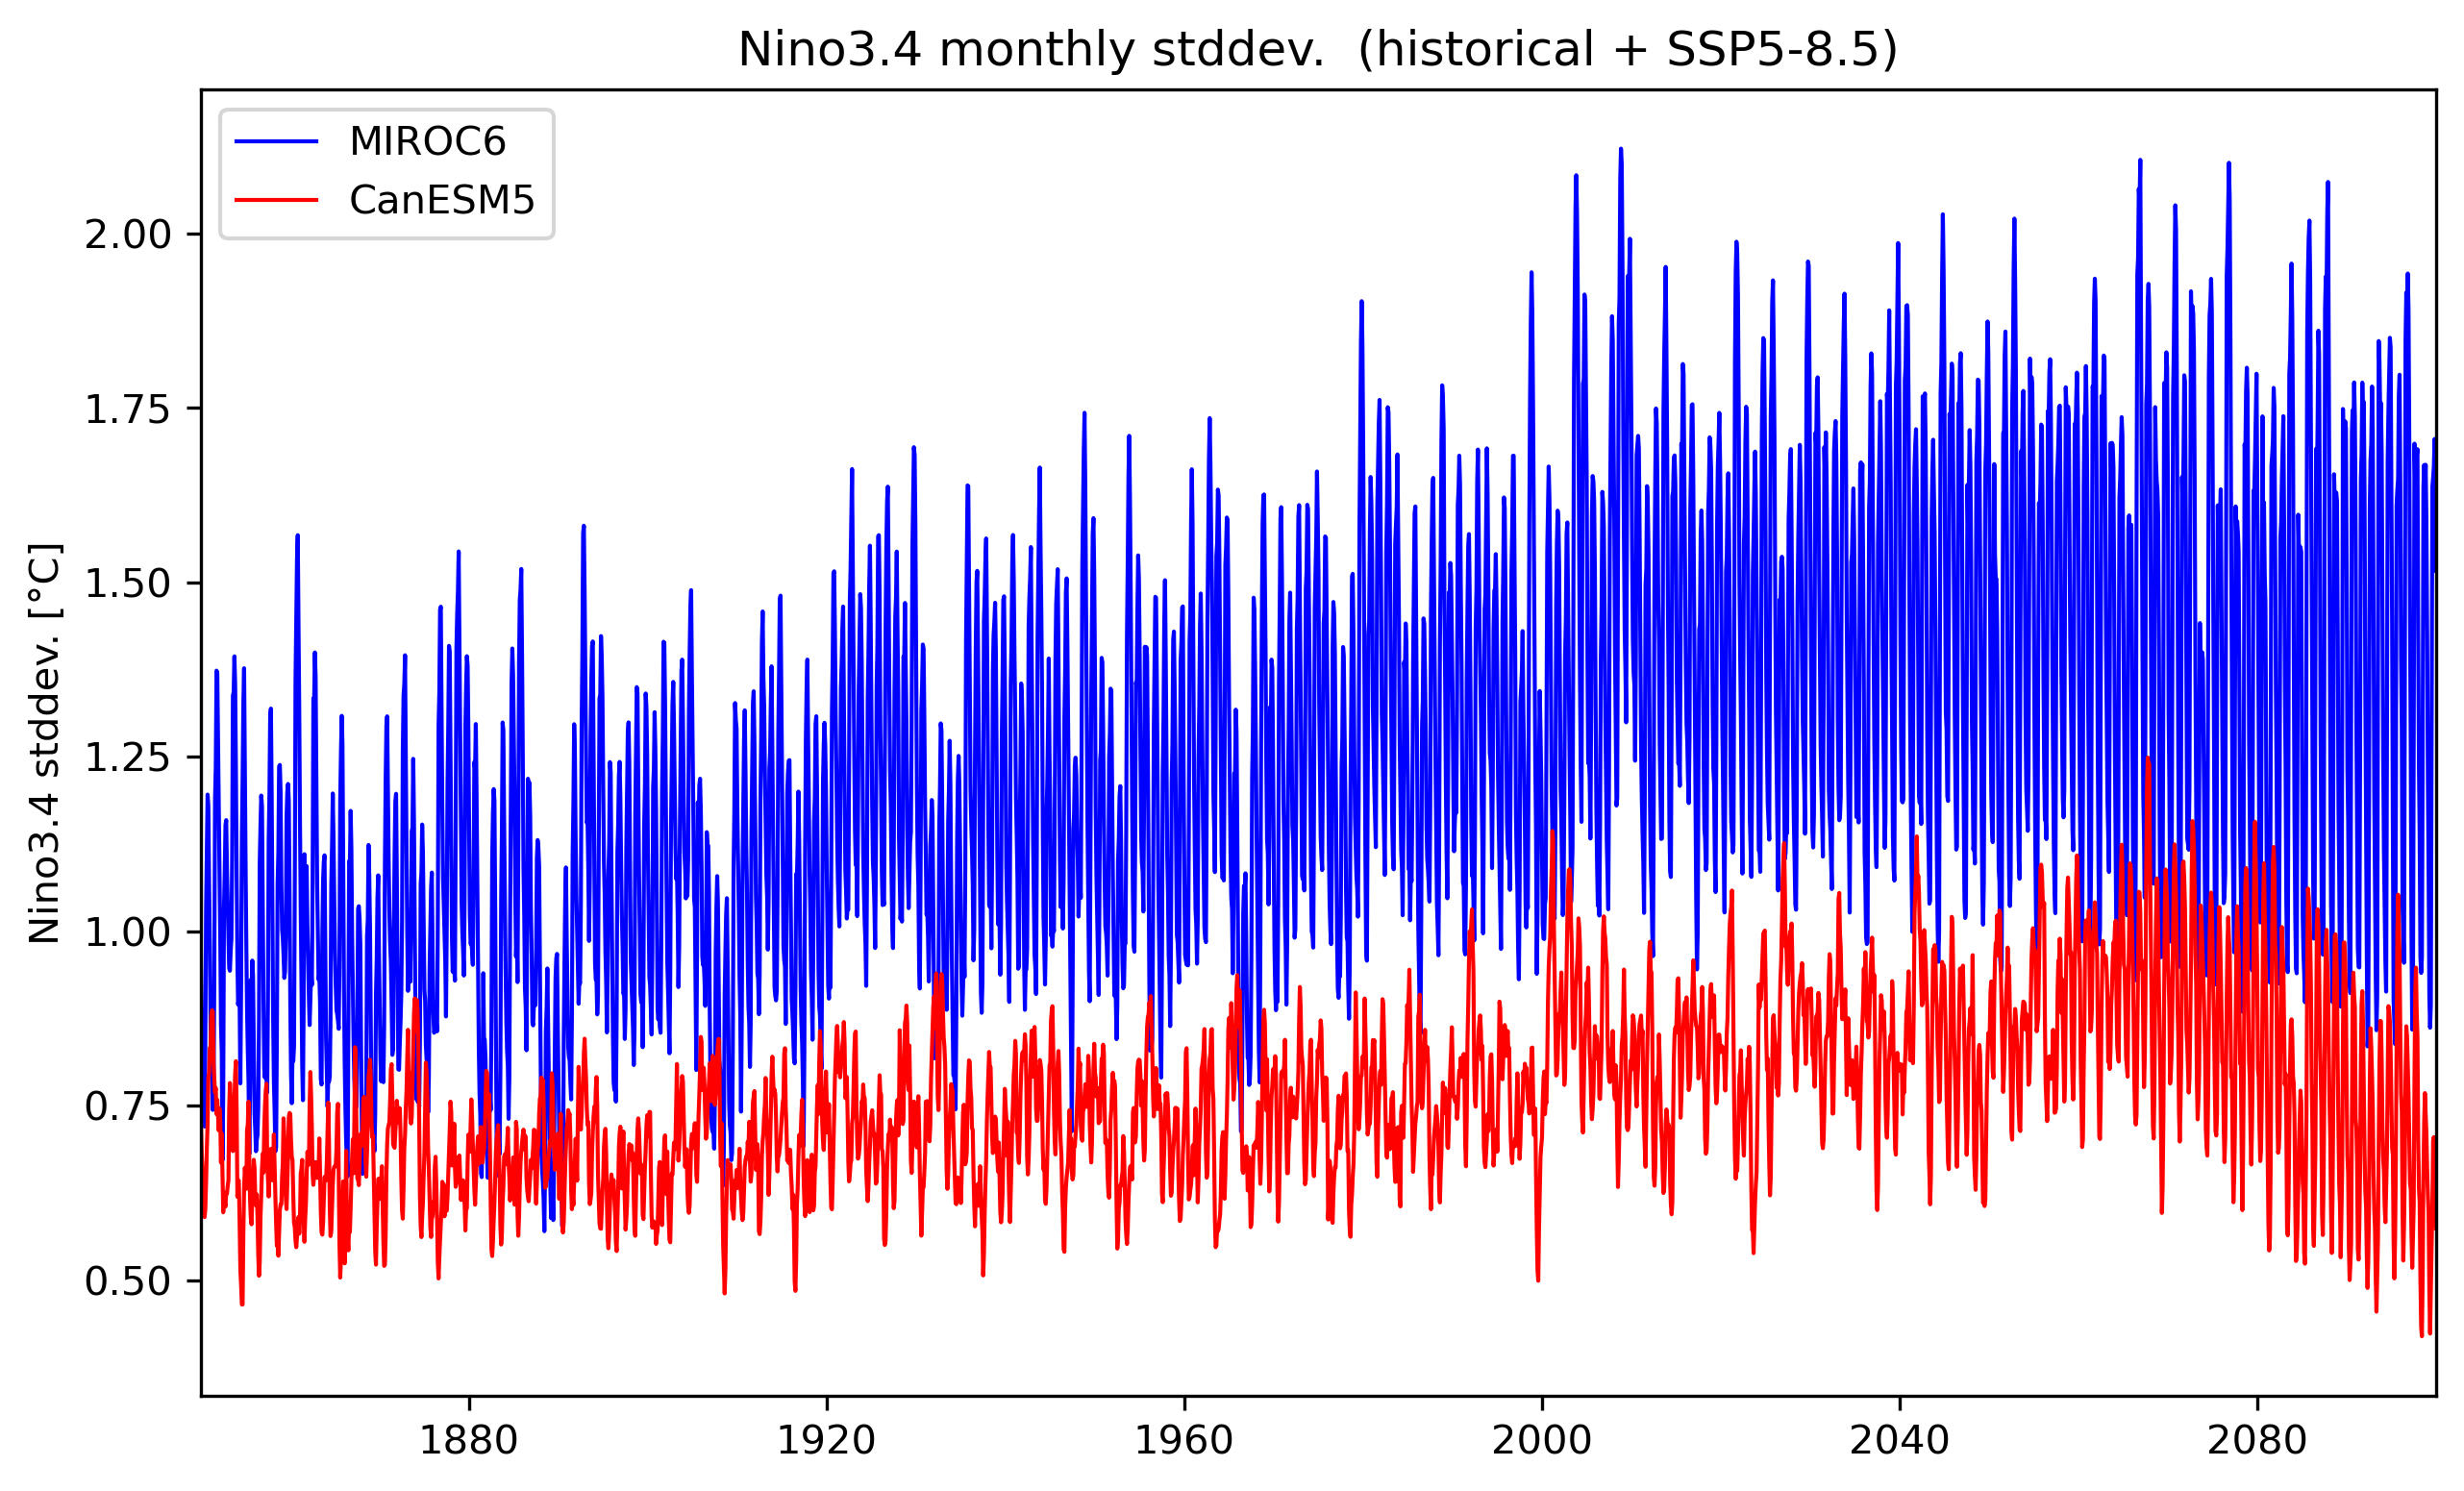

In [33]:
# time series
plt.figure(figsize=(10, 6), dpi=300)

# plt.plot(miroc_nino34['time'].values,miroc_nino34[var].transpose(),color='lightblue',linewidth=0.5);
plt.plot(miroc6_nino34['time'].values,miroc6_nino34[var].std(dim='ensemble'),color='blue',linewidth=1,label='MIROC6');
plt.plot(canesm5_nino34['time'].values,canesm5_nino34[var].std(dim='ensemble'),color='red',linewidth=1,label='CanESM5');
# plt.plot(cesm_GSAT_ym_anom['year'],cesm_GSAT_ym_anom['tas'].mean(dim='ensemble'),color='blue',linewidth=1);

plt.legend()
plt.title('Nino3.4 monthly stddev.  (historical + SSP5-8.5)')

plt.ylabel('Nino3.4 stddev. [°C]')
plt.xlim([pd.Timestamp('1850-01-01'),pd.Timestamp('2100-01-01')])
# plt.xlim([1850,2100])

plt.savefig(plotdir+'nino34_monthly_stddev.png', bbox_inches='tight', dpi=300)

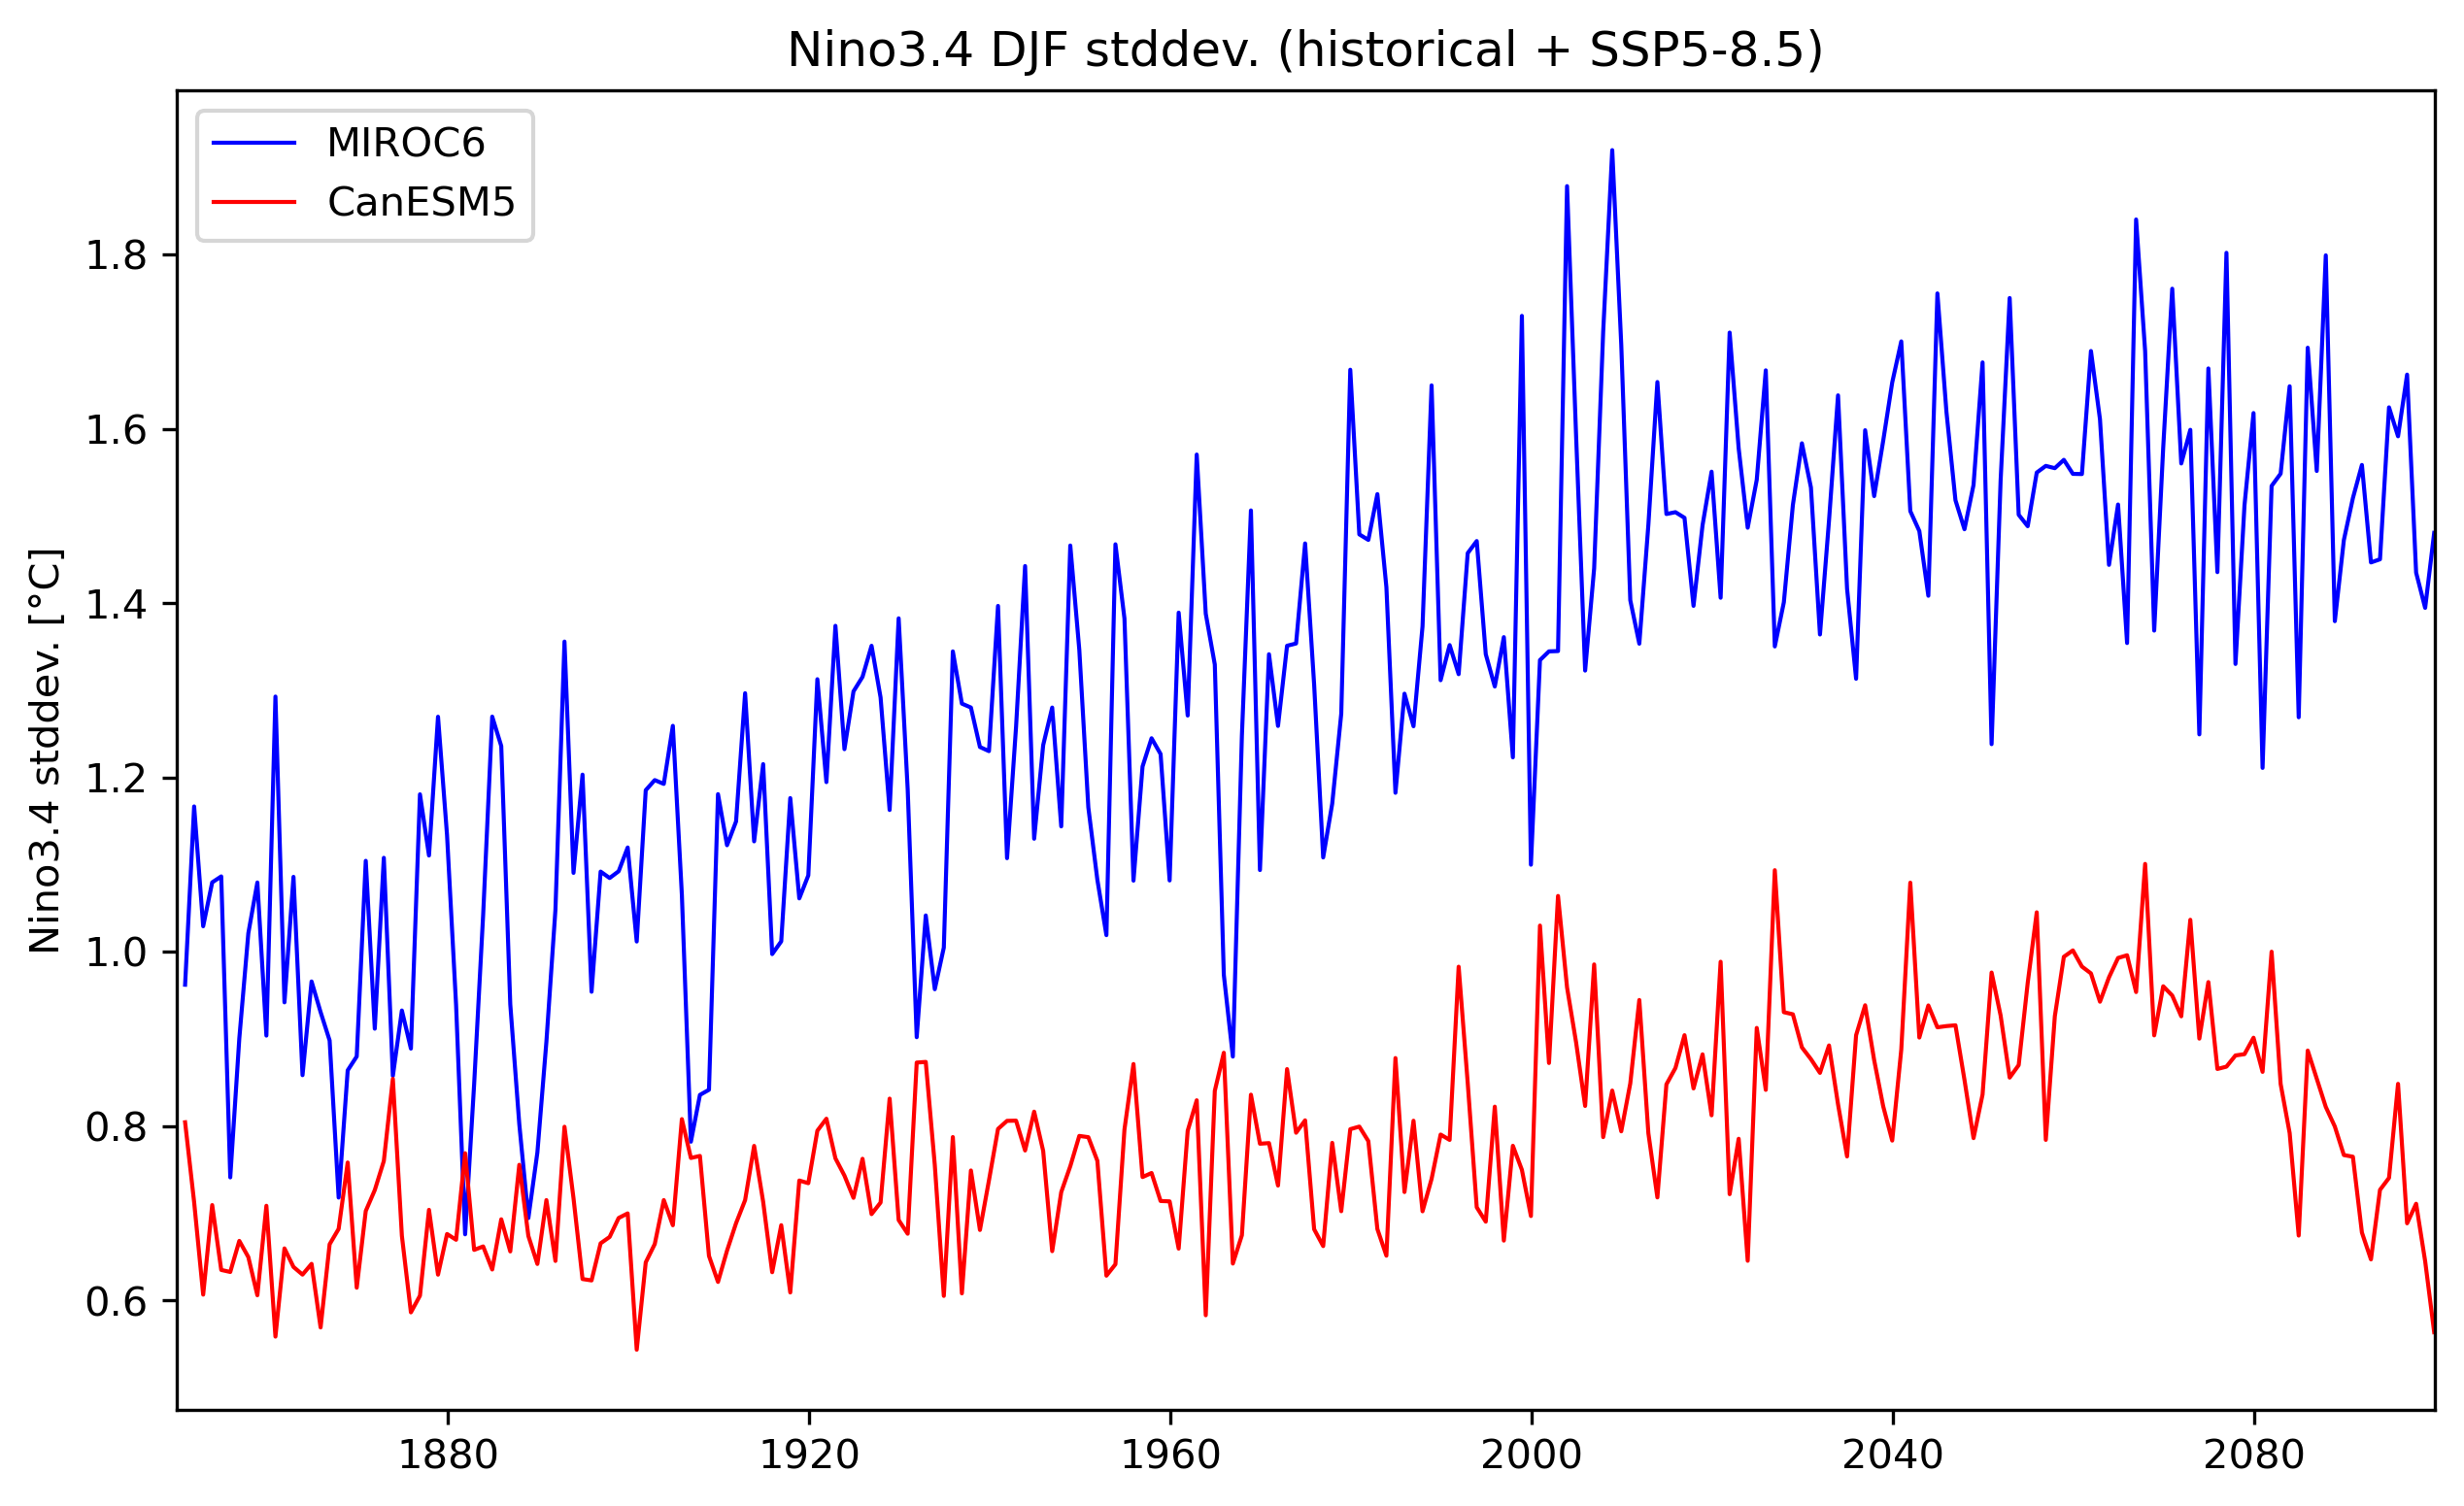

In [34]:
# time series
plt.figure(figsize=(10, 6), dpi=300)


plt.plot(miroc6_nino34_DJF['time'].values,miroc6_nino34_DJF.std(dim='ensemble'),color='blue',linewidth=1,label='MIROC6');
plt.plot(canesm5_nino34_DJF['time'].values,canesm5_nino34_DJF.std(dim='ensemble'),color='red',linewidth=1,label='CanESM5');



plt.legend()
plt.title('Nino3.4 DJF stddev. (historical + SSP5-8.5)')

plt.ylabel('Nino3.4 stddev. [°C]')
plt.xlim([pd.Timestamp('1850-01-01'),pd.Timestamp('2100-01-01')])
# plt.xlim([1850,2100])

plt.savefig(plotdir+'nino34_DJF_stddev.png', bbox_inches='tight', dpi=300)